In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Integration
Integrate `4/(1+x**2)` on interval `[0,1]` by rectangle method (RM) - splitting to 100 interals, $n=100$:
$$
I^{\rm OP} = \sum_{i=0}^{n-1} f(x_i + \xi h)h
$$
$$
x_i = a + ih;\quad h=\frac{b-a}{n}
$$
Calculate for $\xi = 0$

In [13]:
def quad_rectangle(f, a, b, N, xi=0.5):
    # task 3
    dx = (b-a)/N
    x = a + (xi + np.arange(N))*dx
    return np.sum(f(x)*dx)

In [14]:
def f(x): return 4/(1+x**2)

In [15]:
xis = np.linspace(0, 1, 11)
ints = np.array([quad_rectangle(f, 0, 1, 100, xi) for xi in xis])

In [16]:
print(quad_rectangle(f, 0, 1, 100, xi=0.) - np.pi)

0.009983333333335676


In [17]:
print(quad_rectangle(f, 0, 1, 100, xi=0.5) - np.pi)

8.333333331833614e-06


$\xi=0.5$, is the optimal choice - resulting the second order midpoint rule.

### Richardson extrapolation
Wwe approximate the unknown integral $I$ with a numerical valua $\hat I(h)$ with error $E(h)$:
$$\hat I(h)  = I + E(h).$$

If we can express the error $E$ as a polynomical of the integration step $h$
$$
E = A_1h^{p_1} + A_2h^{p_2} + A_3h^{p_3} + \ldots,
$$
we can eliminate the leading term of the series as
$$
\hat I^{(1)} = \frac{2^{p_1} \hat I(h) - \hat I(2h)}{2^{p_1} - 1} = I + A'_2h^{p_2} + A'_3h^{p_3} + \ldots
$$
This is called Richardson extrapolation.

Calculate the integral from the previous task using the trapezoid rule with division into 5 and 10 intervals. Use the Richardson interpolation to eliminate the (second order) error and compare the resulting accuracy

In [21]:
def quad_trapezoid(f, a, b, N):
    # task 4


In [ ]:
N = 10

In [ ]:
I_h = quad_trapezoid(f, 0, 1, N)
I_2h = quad_trapezoid(f, 0, 1, N//2)
I_Richardson = # task 5
print(I_h-np.pi)
print(I_2h-np.pi)
print(I_Richardson-np.pi)


### Romberg integration

Just for information, will be discussed at the next exercise...

Subsequent error terms can be eliminated by repeated application of the Richardson extrapolation. If we use the trapezoid rule with $2^N$ intervals, we can extrapolate  $N$-times, which leads to the order of the method $2(N+1)$.

In [18]:
def romberg(f, a, b, N, debug=False):
    dx = (b-a)
    a = [0.5*dx*(f(a) + f(b))]
    for i in range(1, N):
        dx *= 0.5
        x = (np.arange(0, 2**(i), 2) + 1)*dx
        a.append(a[-1]*0.5 + np.sum(f(x))*dx)

    b = [np.array(a)]
    for j in range(1, N):
        b.append((2**(2*j) * b[-1][1:] - b[-1][:-1])/(2**(2*j) - 1))
    
    if debug:
        for i, l in enumerate(b):
            print("%d. order estimates:"%(2*(i+1)), l-np.pi)
    return b[-1][0]

In [19]:
romberg(f, 0, 1, 5, debug=True)

2. order estimates: [-0.14159265 -0.04159265 -0.01041618 -0.00260416 -0.00065104]
4. order estimates: [-8.25932026e-03 -2.40261388e-05 -1.51131086e-07 -2.36497089e-09]
6. order estimates: [5.24993469e-04 1.44053610e-06 7.55276997e-09]
8. order estimates: [-6.86982792e-06 -1.51929971e-08]
10. order estimates: [1.1687924e-08]


3.141592665277717

In [26]:
N = np.arange(1, 25)
I = np.array([romberg(f, 0, 1, n) for n in N])
I_trapezoid = np.array([quad_trapezoid(f, 0, 1, 2**(n-1)) for n in N])
I_rectangle = np.array([quad_rectangle(f, 0, 1, 2**(n-1), xi=0) for n in N])
h = 1/2**(N)

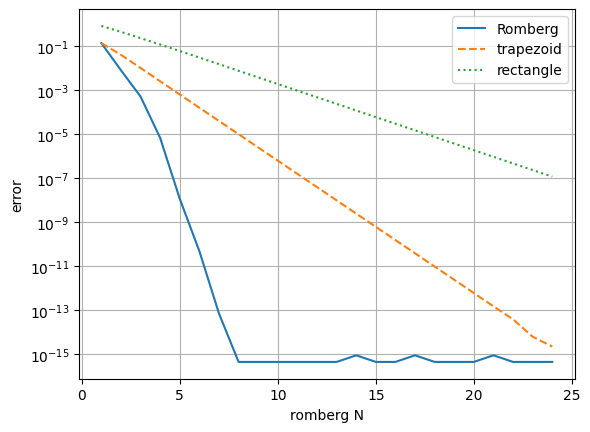

In [29]:
plt.semilogy(N, np.abs(I-np.pi), label="Romberg")
plt.semilogy(N, np.abs(I_trapezoid-np.pi), "--", label="trapezoid")
plt.semilogy(N, np.abs(I_rectangle-np.pi), ":", label="rectangle")
plt.legend()
plt.ylabel("error")
plt.xlabel("romberg N")
plt.grid()

In [ ]:
romberg(f, 0, 1, 9)

In [ ]:
np.pi

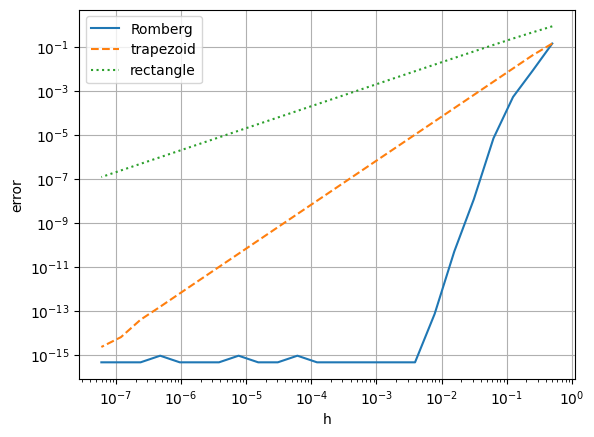

In [31]:
plt.plot(h, np.abs(I-np.pi), label="Romberg")
plt.plot(h, np.abs(I_trapezoid-np.pi), "--", label="trapezoid")
plt.plot(h, np.abs(I_rectangle-np.pi), ":", label="rectangle")
plt.legend()
plt.ylabel("error")
plt.xlabel("h")
plt.grid()
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")